In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
flight_data = pd.read_csv('airlines_flights_data.csv')
flight_data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
flight_data.drop(columns = 'index', inplace = True)
flight_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
flight_data.shape


(300153, 11)

In [5]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
flight_data.duplicated().sum()

np.int64(0)

In [7]:
flight_data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
flight_data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
flight_data['airline'].nunique()

6

In [10]:
flight_data['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [11]:
flights_by_airline = flight_data['airline'].value_counts()
flights_by_airline

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [12]:
flight_data['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-3211       1
6E-6474       1
6E-2914       1
SG-1058       1
6E-2939       1
Name: count, Length: 1561, dtype: int64

In [13]:
flight_data['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [14]:
flight_data['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [15]:
flight_data['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [16]:
flight_data['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [17]:
flight_data['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [18]:
flight_data['days_left'].value_counts()

days_left
25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: count, dtype: int64

Text(0, 0.5, 'Number of flights')

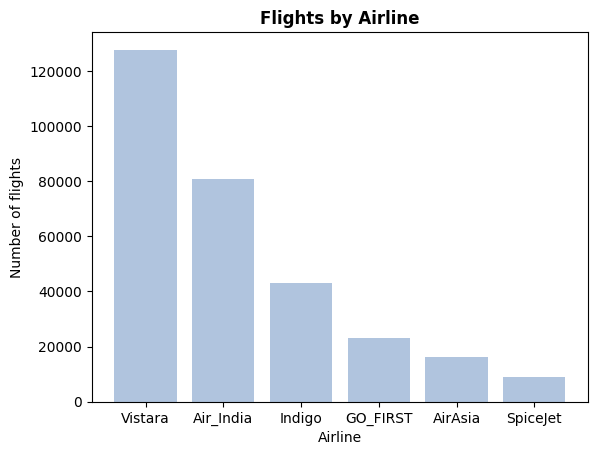

In [19]:
plt.bar(flights_by_airline.index, flights_by_airline.values, color = 'lightsteelblue')
plt.title('Flights by Airline',fontweight = 'bold')
plt.xlabel('Airline')
plt.ylabel('Number of flights')

Text(0, 0.5, 'Number of Flights')

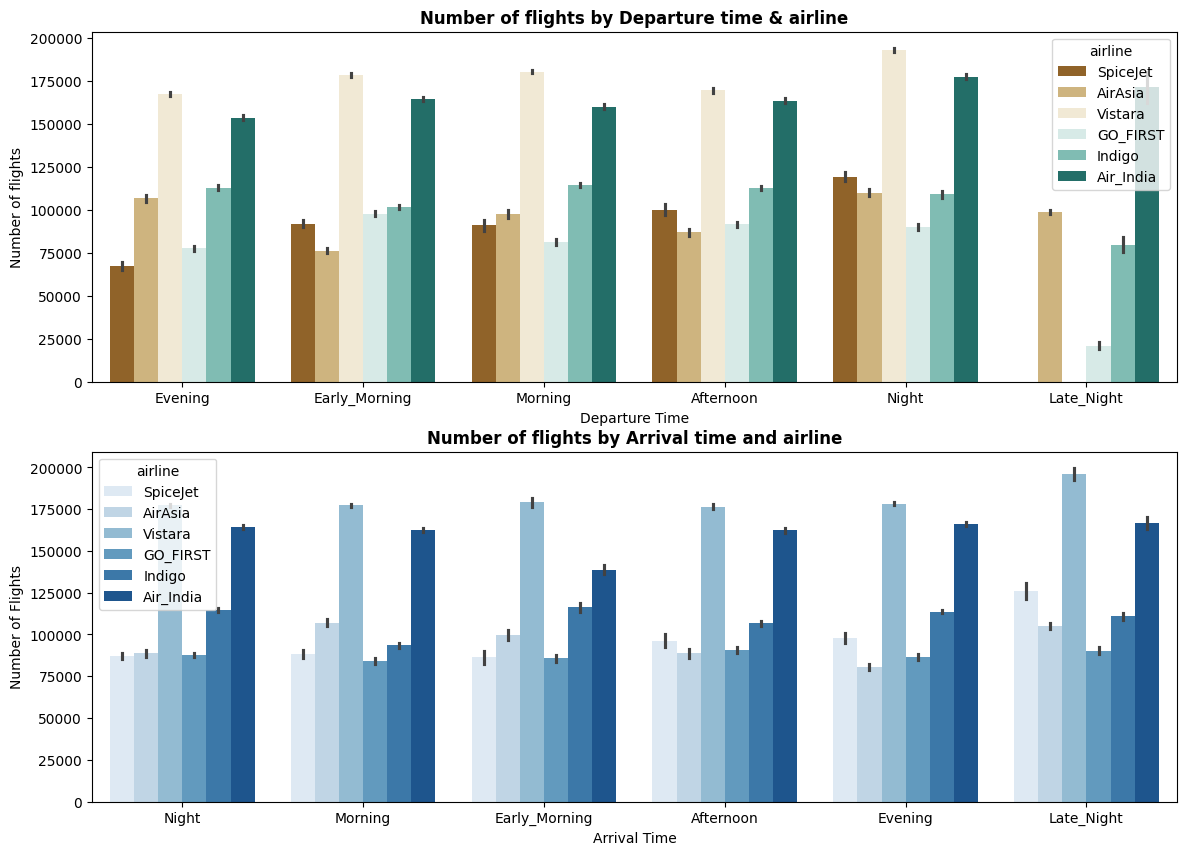

In [20]:


fig,axs = plt.subplots(2,1, figsize = (14,10))
plt.subplot(2,1,1)
d_time = flight_data['departure_time'].index
d_count = flight_data['departure_time'].values
sns.barplot(data = flight_data, x = d_count, y = d_time, hue = 'airline', palette= 'BrBG')
plt.title('Number of flights by Departure time & airline',fontweight = 'bold')
plt.xlabel('Departure Time')
plt.ylabel('Number of flights')

plt.subplot(2,1,2)
a_time = flight_data['arrival_time'].index
a_count = flight_data['arrival_time'].values
sns.barplot(data=flight_data, x = a_count, y = a_time , hue = 'airline', palette = 'Blues')
plt.title('Number of flights by Arrival time and airline',fontweight = 'bold')
plt.xlabel('Arrival Time')
plt.ylabel('Number of Flights')

Text(0, 0.5, 'Destination City')

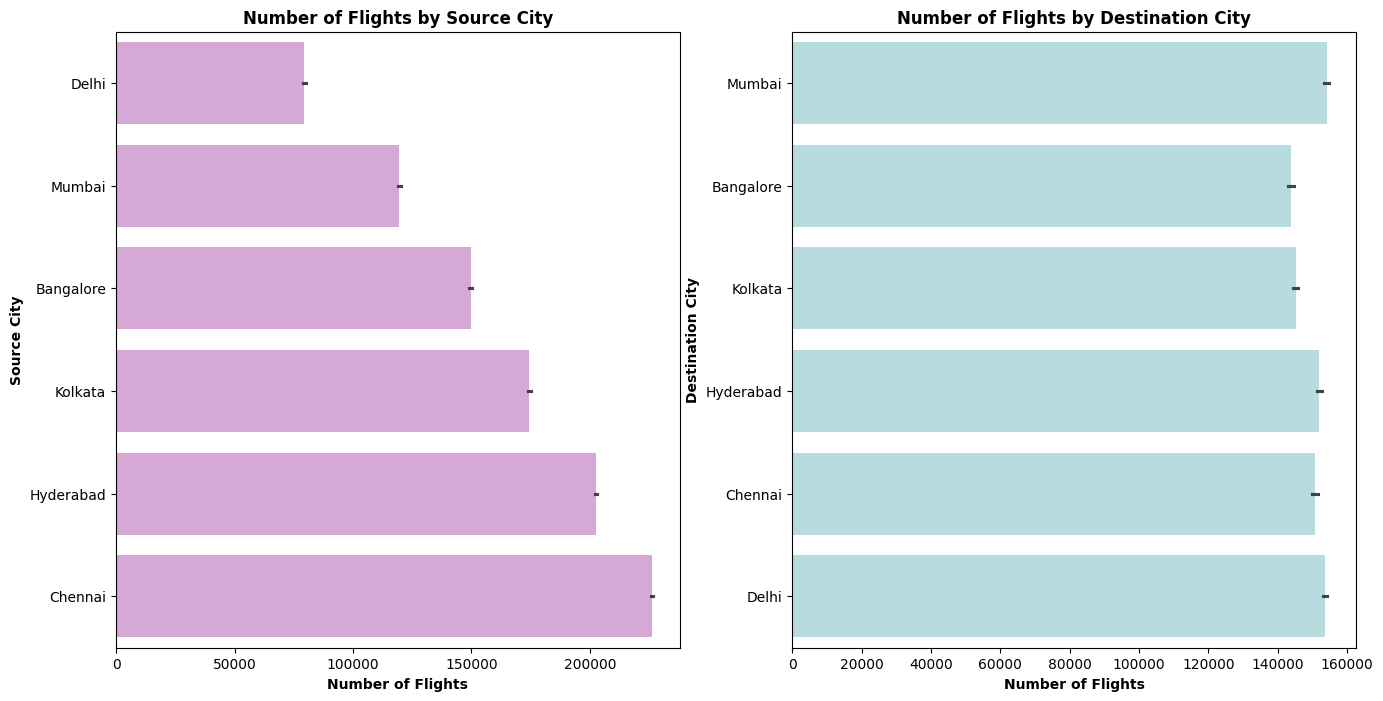

In [21]:
fig,axs = plt.subplots(1,2, figsize = (16,8))

plt.subplot(1,2,1)
source = flight_data['source_city'].index
freq = flight_data['source_city'].values

sns.barplot(data = flight_data, x = source, y = freq, color = 'plum')
plt.title('Number of Flights by Source City',fontweight = 'bold')
plt.xlabel('Number of Flights',fontweight = 'bold')
plt.ylabel('Source City',fontweight = 'bold')

plt.subplot(1,2,2)
dest = flight_data['destination_city'].index
freq_d = flight_data['destination_city'].values

sns.barplot(data = flight_data, x = dest, y = freq_d, color = 'powderblue')
plt.title('Number of Flights by Destination City',fontweight = 'bold')
plt.xlabel('Number of Flights',fontweight = 'bold')
plt.ylabel('Destination City',fontweight = 'bold')


Text(0.5, 1.0, 'Price comparison by Airline')

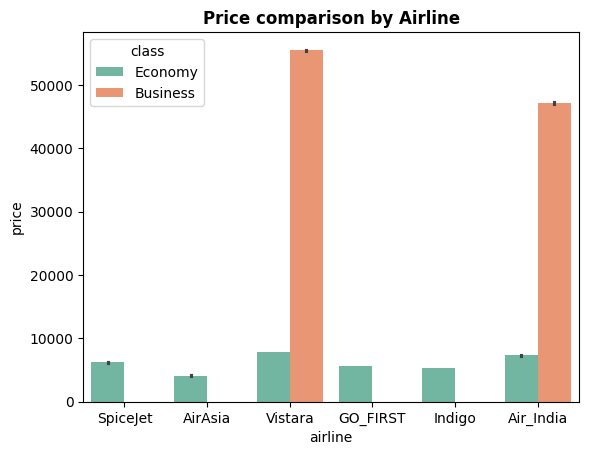

In [22]:
sns.barplot(data = flight_data, y = 'price', x = 'airline', hue = 'class', palette= 'Set2')
plt.title('Price comparison by Airline', fontweight = 'bold')


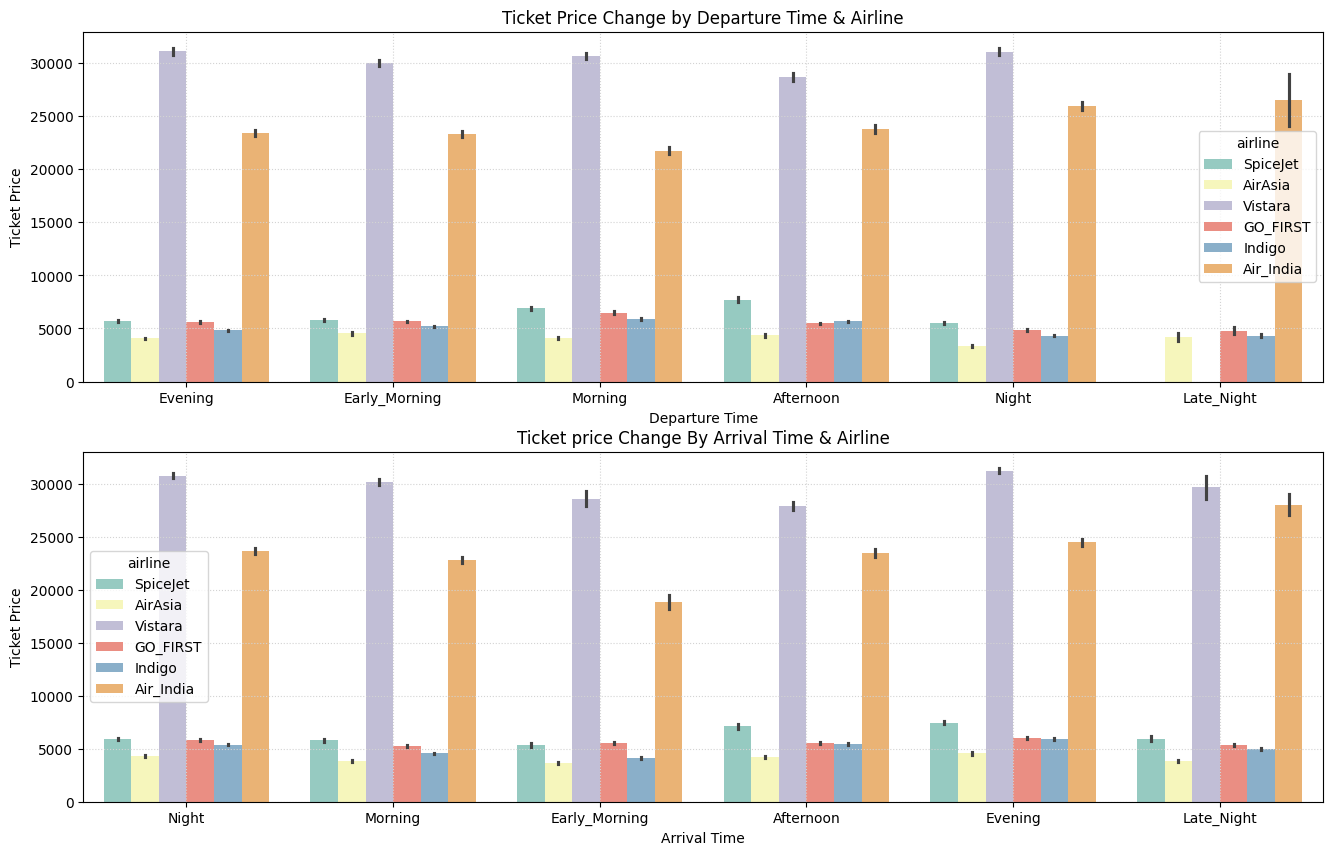

In [23]:
fig,axs = plt.subplots(2,1,figsize = (16,10))

plt.subplot(2,1,1)
sns.barplot(data = flight_data, x = 'departure_time', y = 'price', hue = 'airline', palette='Set3')
plt.title('Ticket Price Change by Departure Time & Airline')
plt.xlabel('Departure Time')
plt.ylabel('Ticket Price')
plt.grid(ls = ':', color = 'lightgray')

plt.subplot(2,1,2)
sns.barplot(data = flight_data, x = 'arrival_time', y = 'price', hue = 'airline', palette='Set3')
plt.title('Ticket price Change By Arrival Time & Airline')
plt.xlabel('Arrival Time')
plt.ylabel('Ticket Price')
plt.grid(ls = ':', color = 'lightgray')


In [24]:
flight_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<Axes: xlabel='days_left'>

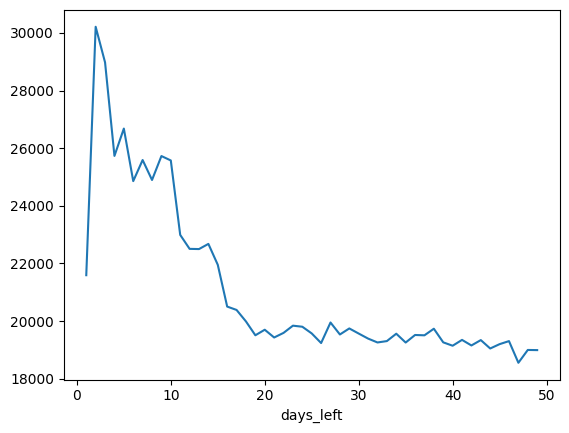

In [25]:
flight_data.groupby('days_left')['price'].mean().plot()

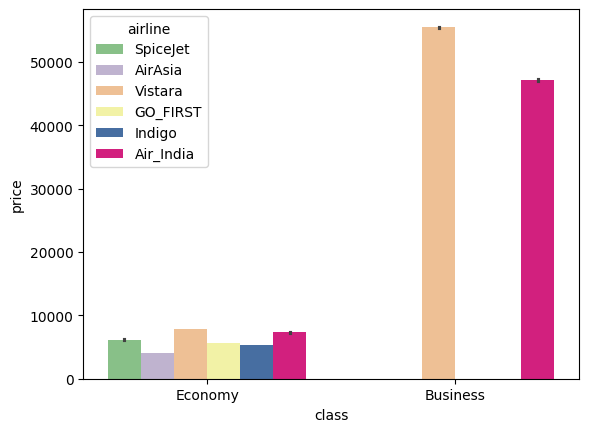

In [26]:
fig = sns.barplot(data = flight_data, x = 'class', y = 'price', hue = 'airline', palette= 'Accent')

In [27]:
flight_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix, classification_report, accuracy_score

In [29]:
y = flight_data['price']
X = flight_data[['airline','flight', 'source_city', 'departure_time','stops','arrival_time','destination_city', 'class', 'duration','days_left']]

X = pd.get_dummies(X, columns= ['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class'], drop_first=True, dtype = int)

X.head()



,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,flight_6.00E-102,flight_6.00E-105,flight_6.00E-113,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2.17,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
1,2.33,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,2.17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2.25,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,2.33,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
pre_y = model.predict(X_test)

In [36]:
r2_score = r2_score(y_test, pre_y)
r2_score

0.9260622220968409